# Soccer Analytics with python - World Cup 2022: Portugal vs Morocco

In [1]:
from statsbombpy import sb
import mplsoccer as mpl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Statbombs WC 2022 Data

In [2]:
matches = sb.matches(competition_id=43, season_id=106)

In [3]:
matches.head()

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3857266,2022-11-26,18:00:00.000,International - FIFA World Cup,2022,France,Denmark,2,1,available,...,2023-01-14T10:20:03.249094,2,Group Stage,Stadium 974,Szymon Marciniak,Didier Deschamps,Kasper Hjulmand,1.1.0,2,2
1,3857289,2022-11-26,21:00:00.000,International - FIFA World Cup,2022,Argentina,Mexico,2,0,available,...,2022-11-28T11:11:01.911611,2,Group Stage,Lusail Stadium,Daniele Orsato,Lionel Sebastián Scaloni,Gerardo Daniel Martino,1.1.0,2,2
2,3857269,2022-11-28,18:00:00.000,International - FIFA World Cup,2022,Brazil,Switzerland,1,0,available,...,2022-11-29T18:37:35.696075,2,Group Stage,Stadium 974,Ivan Arcides Barton Cisneros,Adenor Leonardo Bacchi,Murat Yakin,1.1.0,2,2
3,3857294,2022-11-29,17:00:00.000,International - FIFA World Cup,2022,Netherlands,Qatar,2,0,available,...,2022-12-27T15:02:19.134856,3,Group Stage,Al Bayt Stadium,Bakary Papa Gassama,Louis van Gaal,Félix Sánchez Bas,1.1.0,2,2
4,3857260,2022-11-30,21:00:00.000,International - FIFA World Cup,2022,Saudi Arabia,Mexico,1,2,available,...,2022-12-01T19:56:40.363859,3,Group Stage,Lusail Stadium,Michael Oliver,Hervé Renard,Gerardo Daniel Martino,1.1.0,2,2


In [4]:
matches['home_team'].unique()

array(['France', 'Argentina', 'Brazil', 'Netherlands', 'Saudi Arabia',
       'Portugal', 'England', 'Morocco', 'Croatia', 'Japan', 'Serbia',
       'Spain', 'Cameroon', 'Belgium', 'Germany', 'United States',
       'Qatar', 'South Korea', 'Poland', 'Ghana', 'Costa Rica',
       'Switzerland', 'Tunisia', 'Uruguay', 'Senegal', 'Iran', 'Canada',
       'Wales', 'Ecuador', 'Mexico', 'Australia', 'Denmark'], dtype=object)

## Morocco was the dark horse in the competition, let's pick them in our analysis

In [5]:
morocco_wc_2022 = matches[(matches['home_team'] == 'Morocco') |( matches['away_team'] == 'Morocco')]

In [6]:
morocco_wc_2022

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
8,3869486,2022-12-10,17:00:00.000,International - FIFA World Cup,2022,Morocco,Portugal,1,0,available,...,2023-01-04T12:36:10.102347,5,Quarter-finals,Al Thumama Stadium,Facundo Tello Figueroa,Hoalid Regragui,Fernando Manuel Fernandes da Costa Santos,1.1.0,2,2
10,3869684,2022-12-17,17:00:00.000,International - FIFA World Cup,2022,Croatia,Morocco,2,1,available,...,2022-12-18T21:30:47.341680,7,3rd Place Final,Sheikh Khalifa International Stadium,Abdulrahman Ibrahim Al Jassim,Zlatko Dalić,Hoalid Regragui,1.1.0,2,2
13,3869552,2022-12-14,21:00:00.000,International - FIFA World Cup,2022,France,Morocco,2,0,available,...,2022-12-27T17:55:43.268069,6,Semi-finals,Al Bayt Stadium,César Arturo Ramos Palazuelos,Didier Deschamps,Hoalid Regragui,1.1.0,2,2
16,3869220,2022-12-06,17:00:00.000,International - FIFA World Cup,2022,Morocco,Spain,0,0,available,...,2023-01-14T10:34:30.110784,4,Round of 16,Education City Stadium,Fernando Andrés Rapallini,Hoalid Regragui,Luis Enrique Martínez García,1.1.0,2,2
27,3857283,2022-11-27,15:00:00.000,International - FIFA World Cup,2022,Belgium,Morocco,0,2,available,...,2022-11-28T10:27:19.992068,2,Group Stage,Al Thumama Stadium,César Arturo Ramos Palazuelos,Roberto Martínez Montoliú,Walid Regragui,1.1.0,2,2
48,3857277,2022-11-23,12:00:00.000,International - FIFA World Cup,2022,Morocco,Croatia,0,0,available,...,2022-11-26T11:10:19.194215,1,Group Stage,Al Bayt Stadium,Fernando Andrés Rapallini,Walid Regragui,Zlatko Dalić,1.1.0,2,2
49,3857276,2022-12-01,17:00:00.000,International - FIFA World Cup,2022,Canada,Morocco,1,2,available,...,2022-12-12T17:57:41.588844,3,Group Stage,Al Thumama Stadium,Raphael Claus,John Herdman,Walid Regragui,1.1.0,2,2


## Morocco VS Portugal is an interesting match, so let's analyze it

In [7]:
events = sb.events(match_id = '3869486')

### Inspect available columns

In [8]:
events.columns

Index(['ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'block_deflection', 'carry_end_location', 'clearance_aerial_won',
       'clearance_body_part', 'clearance_head', 'clearance_left_foot',
       'clearance_other', 'clearance_right_foot', 'counterpress',
       'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun', 'duel_outcome',
       'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_offensive',
       'foul_committed_type', 'foul_won_advantage', 'foul_won_defensive',
       'goalkeeper_body_part', 'goalkeeper_end_location', 'goalkeeper_outcome',
       'goalkeeper_position', 'goalkeeper_punched_out', 'goalkeeper_technique',
       'goalkeeper_type', 'id', 'index', 'injury_stoppage_in_chain',
       'interception_outcome', 'location', 'match_id', 'minute',
       'miscontrol_aerial_won', 'off_camera', 'out', 'pass_aerial_won',
       'pass_angle', 'pass_assisted_shot_id', 'pass_body_part', 'pass_cross',
       'pa

# Shots Visualization

In [9]:
def shot_visualizer(team):
    shots = events[(events['type'] == "Shot") & 
                (events['team'] == team) &
                (events['shot_type'] != "Penalty")]
    coordinates = shots[['location', 'shot_end_location']]
    x1, y1 = np.array(coordinates['location'].tolist()).T
    x2, y2 = np.array([t[0:2] for t in coordinates['shot_end_location'].tolist()]).T
    shots['x1'], shots['y1'] = x1,y1
    xg = np.array(shots['shot_statsbomb_xg'].tolist())
    goal = ['blue' if g == "Goal" else 'red' for g in shots['shot_outcome'].to_list()]
    pitch = mpl.Pitch(line_alpha=0.5, goal_type='box',goal_alpha=0.3)
    fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                         endnote_height=0.04, title_space=0, endnote_space=0)
    pitch.scatter(x1, y1, s=xg*500,  color=goal, linewidth=1, alpha=1, ax=ax["pitch"], zorder = 3)
    for i, row in shots.iterrows():
        pitch.annotate(round(row.shot_statsbomb_xg,2), xy=(row.x1, row.y1), c='black', va='center', ha='center', size=12, ax=ax["pitch"], zorder = 4)
    pitch.arrows(x1, y1, x2, y2, alpha=0.4, color=goal,
                    headaxislength=3, headlength=3, headwidth=4, width=2, ax=ax["pitch"])
    fig.suptitle(team+"'s Shots", fontsize = 20)
    

## Non Penalty Shots

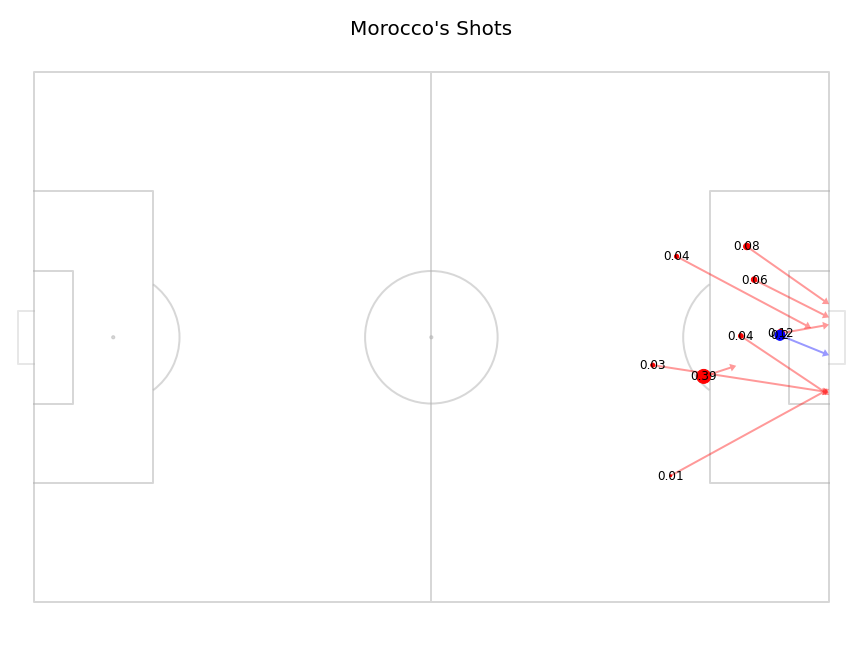

In [10]:
shot_visualizer('Morocco')

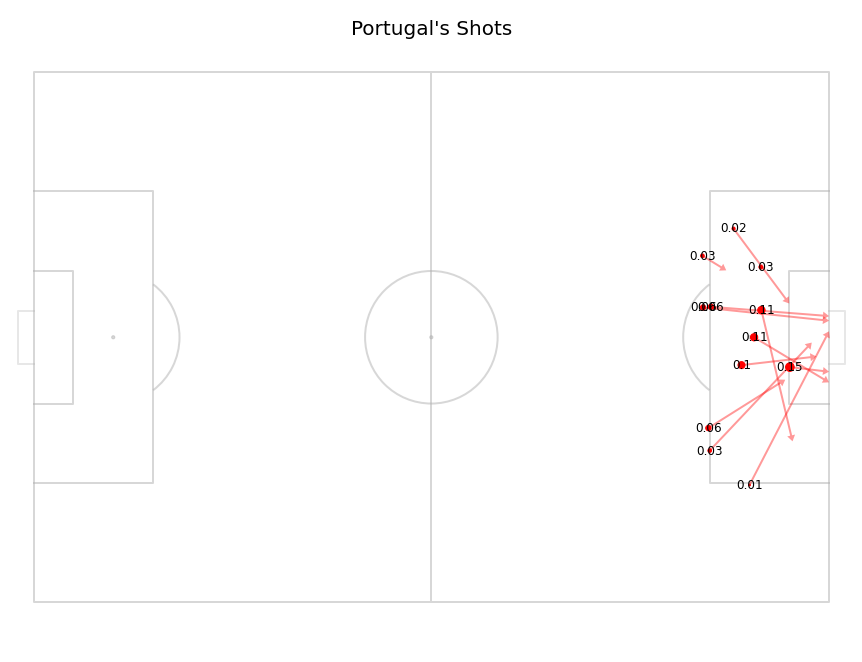

In [11]:
shot_visualizer('Portugal')

In [12]:
shots = events[(events['type'] == "Shot") & 
                (events['shot_type'] != "Penalty")]
shots.groupby('team').agg({'shot_statsbomb_xg':['sum','mean'], 'type':'count'}).reset_index().rename(columns = {'shot_statsbomb_xg':'xG','type':'Total Shots'})

team        xG           Total Shots
                  sum      mean       count
0   Morocco  0.972023  0.108003           9
1  Portugal  0.744121  0.062010          12

### Takeaways
1. Despite Portugal's leading total number of shots, they have failed to produce high quality chances by having lower total xG and xG per shots compared to Morocco.
2. On the other hand, Morocco was able to capitalize opportunities shown by their xG stats.

# Tactical Approach

## Top 10 pass combination for each team

In [13]:
pass_combination = pd.DataFrame(events.groupby(['team','player'])['pass_recipient'].value_counts().reset_index(name='count')).sort_values(['team','count'], ascending = False)
pass_combination.groupby('team').head(10)

,team,player,pass_recipient,count
213,Portugal,Rúben Santos Gato Alves Dias,Kléper Laveran Lima Ferreira,22
167,Portugal,Kléper Laveran Lima Ferreira,Bernardo Mota Veiga de Carvalho e Silva,20
159,Portugal,João Pedro Cavaco Cancelo,Bernardo Mota Veiga de Carvalho e Silva,18
168,Portugal,Kléper Laveran Lima Ferreira,Rúben Santos Gato Alves Dias,18
97,Portugal,Bernardo Mota Veiga de Carvalho e Silva,Kléper Laveran Lima Ferreira,15
214,Portugal,Rúben Santos Gato Alves Dias,Rúben Diogo Da Silva Neves,14
98,Portugal,Bernardo Mota Veiga de Carvalho e Silva,João Pedro Cavaco Cancelo,13
169,Portugal,Kléper Laveran Lima Ferreira,Rúben Diogo Da Silva Neves,13
203,Portugal,Rúben Diogo Da Silva Neves,Kléper Laveran Lima Ferreira,13
170,Portugal,Kléper Laveran Lima Ferreira,José Diogo Dalot Teixeira,12


In [14]:
morocco_starting_11 = pd.DataFrame([p['player'] for p in events['tactics'][0]['lineup']])
portugal_starting_11 = pd.DataFrame([p['player'] for p in events['tactics'][1]['lineup']])

In [15]:
def passing_network_visualizer(df,team_name,min_pass):
    df = df[(df['pass_recipient'].isin(pd.concat([morocco_starting_11,portugal_starting_11])['name'])) & (df['player'].isin(pd.concat([morocco_starting_11,portugal_starting_11])['name']))]
    passes = (df.type == 'Pass') & (df.team == team_name)  & (df.pass_outcome.isnull()) 

    coordinates = df.loc[passes,['location', 'pass_end_location']]
    x1, y1 = np.array(coordinates['location'].tolist()).T
    x2, y2 = np.array([t[0:2] for t in coordinates['pass_end_location'].tolist()]).T
    passes = df.loc[passes, ["player", "pass_recipient"]]
    passes['x1'],passes['y1'],passes['x2'],passes['y2'] = x1,y1,x2,y2
    #adjusting that only the surname of a player is presented.

    passes["player"] = passes["player"].apply(lambda x: str(x).split()[-1])
    passes["pass_recipient"] = passes["pass_recipient"].apply(lambda x: str(x).split()[-1])
    
    scatter_df = pd.DataFrame()
    for i, name in enumerate(passes["player"].unique()):
        passx = passes.loc[passes["player"] == name]["x1"].to_numpy()
        recx = passes.loc[passes["pass_recipient"] == name]["x2"].to_numpy()
        passy = passes.loc[passes["player"] == name]["y1"].to_numpy()
        recy = passes.loc[passes["pass_recipient"] == name]["y2"].to_numpy()
        scatter_df.at[i, "player"] = name
        #make sure that x and y location for each circle representing the player is the average of passes and receptions
        scatter_df.at[i, "x1"] = np.mean(np.concatenate([passx, recx]))
        scatter_df.at[i, "y1"] = np.mean(np.concatenate([passy, recy]))
        #calculate number of passes
        scatter_df.at[i, "no"] = passes.loc[passes["player"] == name].count().iloc[0]
    scatter_df['marker_size'] = (scatter_df["no"] / scatter_df["no"].max() * 1500)
    
    #counting passes between players
    passes["pair_key"] = passes.apply(lambda x: "_".join(sorted([x["player"], x["pass_recipient"]])), axis=1)
    lines_df = passes.groupby(["pair_key"]).x1.count().reset_index()
    lines_df.rename({'x1':'pass_count'}, axis='columns', inplace=True)
    #setting a threshold. You can try to investigate how it changes when you change it.
    lines_df = lines_df[lines_df['pass_count']>=min_pass]
    
    #plot once again pitch and vertices
    pitch = mpl.Pitch(line_alpha=0.5, goal_type='box',goal_alpha=0.3)
    fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                         endnote_height=0.04, title_space=0, endnote_space=0)
    pitch.scatter(scatter_df.x1, scatter_df.y1, s=scatter_df.marker_size, color='#2f5fed', edgecolors='grey', linewidth=1, alpha=1, ax=ax["pitch"], zorder = 3)
    for i, row in scatter_df.iterrows():
        pitch.annotate(row.player, xy=(row.x1, row.y1), c='black', va='center', ha='center', weight = "bold", size=16, ax=ax["pitch"], zorder = 4)
    for i, row in lines_df.iterrows():
            player1 = row["pair_key"].split("_")[0]
            player2 = row['pair_key'].split("_")[1]
            #take the average location of players to plot a line between them 
            player1_x = scatter_df.loc[scatter_df["player"] == player1]['x1'].iloc[0]
            player1_y = scatter_df.loc[scatter_df["player"] == player1]['y1'].iloc[0]
            player2_x = scatter_df.loc[scatter_df["player"] == player2]['x1'].iloc[0]
            player2_y = scatter_df.loc[scatter_df["player"] == player2]['y1'].iloc[0]
            num_passes = row["pass_count"]
            #adjust the line width so that the more passes, the wider the line
            line_width = (num_passes / lines_df['pass_count'].max() * 10)
            #plot lines on the pitch
            pitch.lines(player1_x, player1_y, player2_x, player2_y,
                            alpha=1, lw=line_width, zorder=2, color="#2f5fed", ax = ax["pitch"])
    fig.suptitle(team_name+"'s Starting Eleven Passing Network", fontsize = 20)

## Passing Network

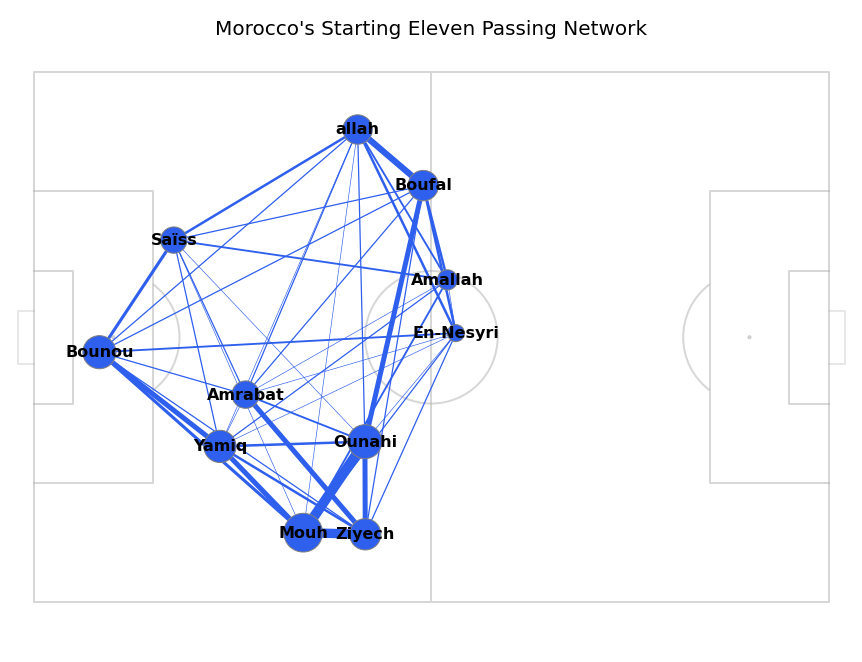

In [16]:
passing_network_visualizer(events,'Morocco',1)

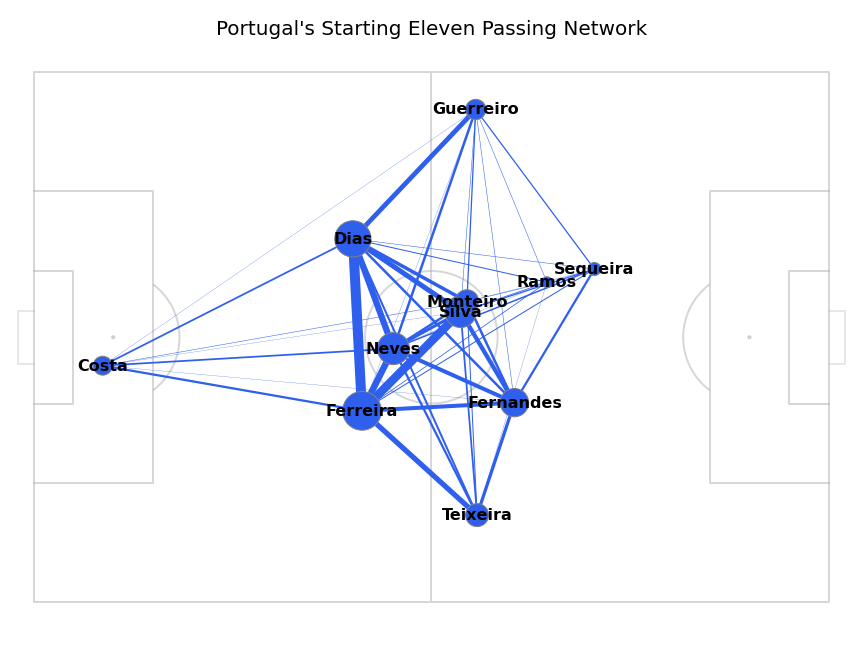

In [17]:
passing_network_visualizer(events,'Portugal',1)

### Takeaways
1. Portugal enjoyed a better share of possession compared to Morocco and heavily rely on build up from their CBs (Ruben Dias - Pepe).
2. Bernardo Silva was Portugal's main outlet of possession as their defenders often give the ball to him, then Bernardo Silva will distribute to other players.
3. Portugal's top passes combination was between defenders and midfield which indicates having difficulty to break through Morocco's formation.
4. Morocco was relying heavily on their right flank having their best players (Ziyech, Hakimi, Ounahi) on that side.

In [18]:
def team_pass_visualizer(df, team):
    events = df[(df['pass_recipient'].isin(pd.concat([morocco_starting_11,portugal_starting_11])['name'])) & (df['player'].isin(pd.concat([morocco_starting_11,portugal_starting_11])['name']))]
    passes = events[(events['type'] == "Pass") & 
                    (events['team'] == team)]
    coordinates = passes[['location', 'pass_end_location']]
    x1, y1 = np.array(coordinates['location'].tolist()).T
    x2, y2 = np.array([t[0:2] for t in coordinates['pass_end_location'].tolist()]).T
    
    pass_outcome = ['blue' if pd.isna(g) else 'red' for g in passes['pass_outcome'].to_list()]
    pitch = mpl.Pitch(line_alpha=0.5, goal_type='box',goal_alpha=0.3)
    fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                         endnote_height=0.04, title_space=0, endnote_space=0)
    
    pitch.arrows(x1, y1, x2, y2, alpha=0.4, color=pass_outcome,
                    headaxislength=3, headlength=3, headwidth=4, width=2, ax=ax['pitch'])
    fig.suptitle(team+"'s Starting Eleven Passes", fontsize = 20)
    
    

## Starting Eleven Passes

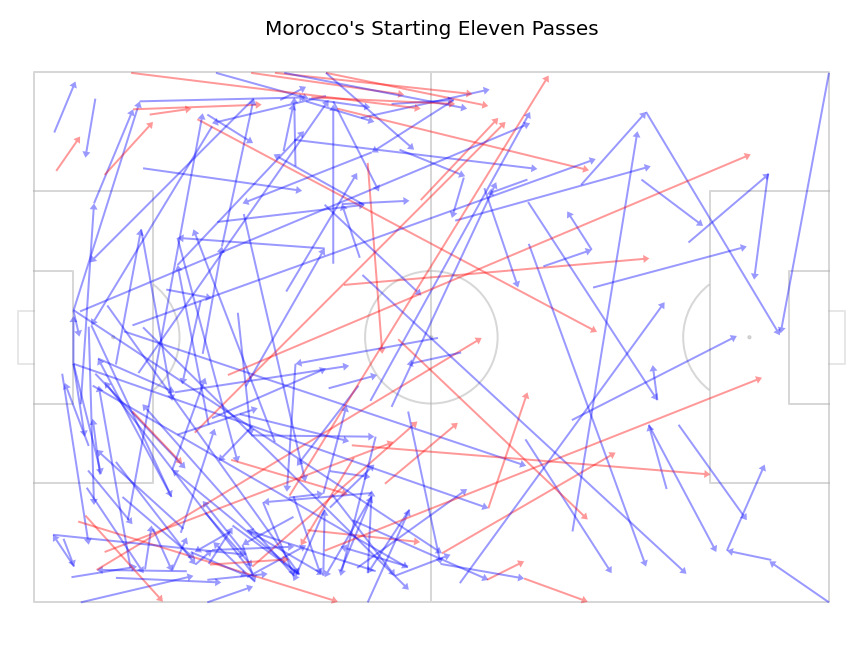

In [19]:
team_pass_visualizer(events, 'Morocco')

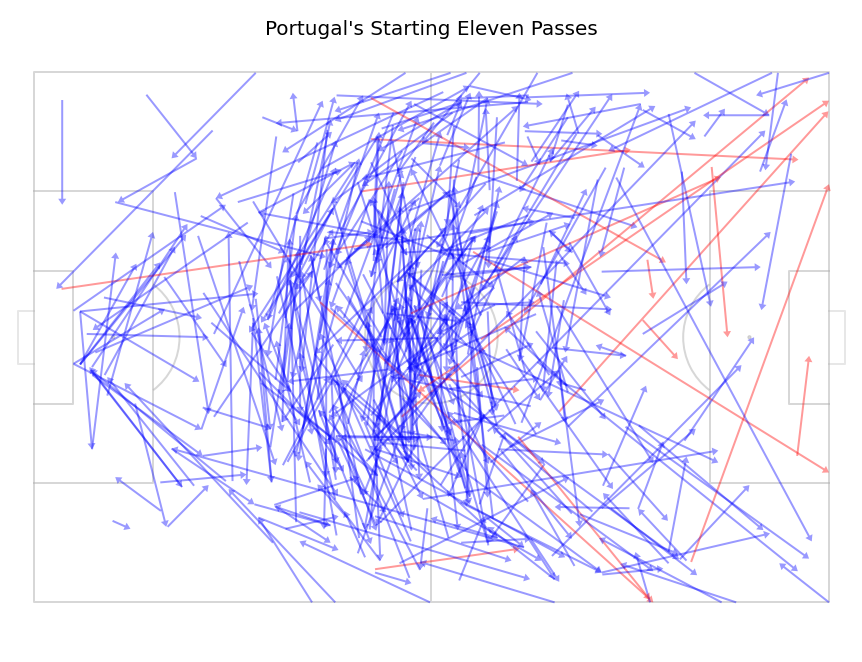

In [20]:
team_pass_visualizer(events, 'Portugal')

## Heat Map

In [21]:
def visualize_heatmap(df, team):
    events = df[~pd.isna(df['location']) & 
                    (df['team'] == team)]
    x, y = np.array(events['location'].tolist()).T
    pitch = mpl.Pitch(line_alpha=0.5, goal_type='box',goal_alpha=0.3)
    fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                         endnote_height=0.04, title_space=0, endnote_space=0)
    pitch.kdeplot(x, y, cmap='Blues', fill=True, levels=10, alpha=0.8, ax=ax['pitch'])
    fig.suptitle(team+"'s Heatmap", fontsize = 20)

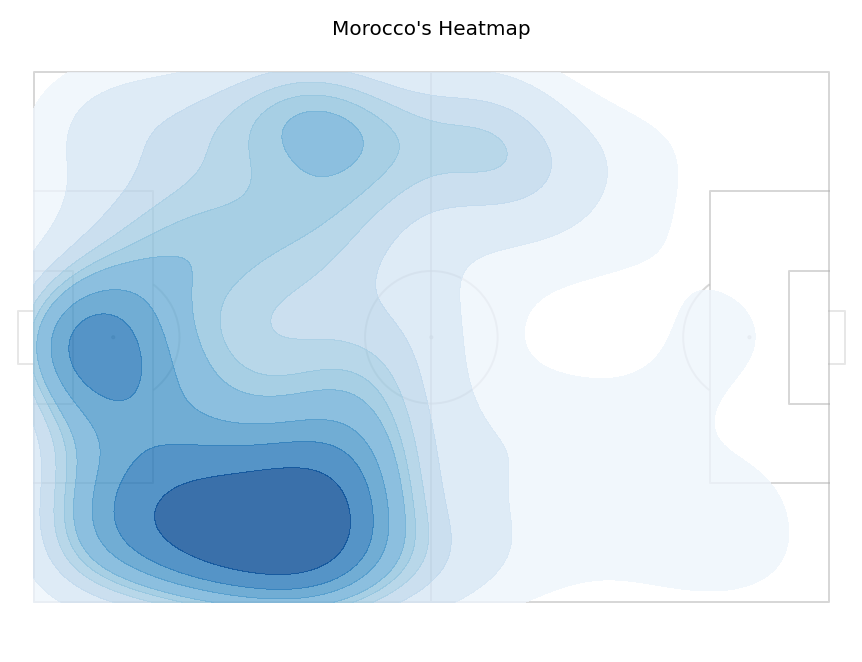

In [22]:
visualize_heatmap(events, 'Morocco')

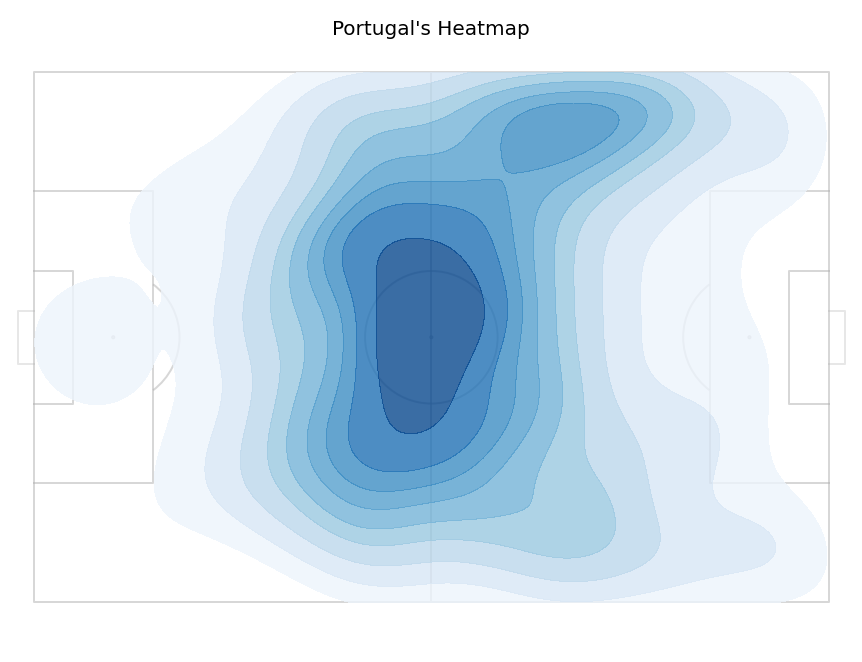

In [23]:
visualize_heatmap(events, 'Portugal')

### Takeaways
1. Despite Portugal enjoyed a better share of possession, they faced difficulty in getting the ball to the penalty box.
2. Portugal's passes and actions mostly happened in the middle of the pitch to control the game.
3. Morocco was unafraid to attempt long passes to exploit counter attacks.
4. Despite relishing control in the middle of the pitch, Morocco was more successful in getting the ball inside Portugal's penalty area.
5. As shown by their top pass combinations, Morocco's actions happened mostly on their right flank.

# Conclusion

The data shown confirm the feeling that I had while watching the game, some points I have recognised back then where:
1. Morocco did a great job to limit Portugal's ability to create chances.
2. Morocco earned a deserved win through their patience and grit by letting Portugal having the ball while exploiting counter attacks, also by optimizing their plays through their best players on the right flank which executed well.
3. Portugal inability to break down Morocco formation saw them really frustrated and couldn't adapt their game plan.